# Описание файла препроцесса данных: 

РАЗБИЕНИЕ ДОКУМЕНТАЦИИ НА СМЫСЛОВЫЕ ГРУППЫ ЧАНКОВ:

Группируем распаршенные данные из документации по категории, и смысловой схожести подкатегорий и создаем чанки (100-500 слов)

ИЗВЛЕЧЕНИЕ ФОТОГРАФИЙ И ТАБЛИЦ: 

Извлекаем таблицы и фотографии из документации, присваивая их к соответствующему чанку

ОЧИСТКА ДАННЫХ:

Уменьшили количество воды и повторяющихся элементов в чанках

### Загрузка данных

In [123]:
!pip install python-docx -q

In [1]:
import pandas as pd
import numpy as np
from docx_module import DocxHandler

In [4]:
df, texts = DocxHandler().process_file('train_data_Sila/data.docx')

In [8]:
df['text'] = df.main_text.apply(lambda x: x.split('|')[-1])

In [12]:
df['words_count'] = df.main_text.apply(lambda x: len(x.split()))

In [13]:
df['name'] = df['title'] + ' - ' + df['subtitle']

In [14]:
names = list(df['name'].value_counts()[df['name'].value_counts() == 1].index)

In [60]:
new_df = []

In [31]:
about_system = df[df['title'] == 'О системе']

In [32]:
about_system.iloc[0]['subsubtitle'] == ''

True

In [33]:
def get_texts(sub_df, idx):
    if pd.isna(sub_df['subsubtitle'].values[idx]) or sub_df['subsubtitle'].values[idx] == '':
        return sub_df['subtitle'].values[idx] + ' | ' + sub_df['text'].values[idx]
    else:
        return sub_df['subtitle'].values[idx] + ' - ' + sub_df['subsubtitle'].values[idx] + ' | ' + sub_df['text'].values[idx]

In [34]:
about_system_main_text = 'Название секции: ' + about_system['title'].values[0] + ' / ' + get_texts(about_system, 0) + ' / ' + get_texts(about_system, 1) + ' / ' + get_texts(about_system, 2) + ' / ' + get_texts(about_system, 3)

In [61]:
new_df.append({'title': about_system['title'].values[0], 'subtitle': 'Наименование и обозначение системы / Область применения системы / Основные функции системы / Роли пользователей', 'images': [], 'main_text': about_system_main_text})

In [37]:
work_in_system = df[df['title'] == 'Работа в системе'].reset_index()

In [41]:
import json
import re

In [56]:
def get_images(sub_df, idxs):
    return [x for x in sub_df['images'].values[idxs] if x != []]

In [57]:
work_in_system_main_text1 = 'Название секции: ' + work_in_system['title'].values[0] + ' / ' + get_texts(work_in_system, 0) + ' / ' + get_texts(work_in_system, 1) + ' / ' + get_texts(work_in_system, 2)

In [62]:
new_df.append({'title': work_in_system['title'].values[0], 'subtitle': 'Запуск системы / Авторизация / Просмотр информации о системе', 'images': get_images(work_in_system, [0, 1, 2]), 'main_text': work_in_system_main_text1})

In [64]:
work_in_system.iloc[[8, 9, 10, 11]]

,index,question_id,sub_question_id,main_text,images,title,subtitle,subsubtitle,text,words_count,name
8,13,2,4,Название секции: Работа в системе / Управление...,[],Работа в системе,Управление учетными записями,,Текст секции: Управление учетными записями (д...,72,Работа в системе - Управление учетными записями
9,14,2,4.0,Название секции: Работа в системе / Управление...,[],Работа в системе,Управление учетными записями,Создание УЗ,Текст секции: Для создания УЗ: Нажмите кнопк...,48,Работа в системе - Управление учетными записями
10,15,2,4.1,Название секции: Работа в системе / Управление...,"[{'path': 'data/extracted_images\image_4.png',...",Работа в системе,Управление учетными записями,Редактирование УЗ,Текст секции: Для редактирования данных в УЗ...,46,Работа в системе - Управление учетными записями
11,16,2,4.2,Название секции: Работа в системе / Управление...,"[{'path': 'data/extracted_images\image_5.png',...",Работа в системе,Управление учетными записями,Удаление УЗ,"Текст секции: Нельзя удалить УЗ, которая исп...",54,Работа в системе - Управление учетными записями


In [65]:
work_in_system_main_text2 = 'Название секции: ' + work_in_system['title'].values[0] + ' / ' + get_texts(work_in_system, 8) + ' / ' + get_texts(work_in_system, 9) + ' / ' + get_texts(work_in_system, 10) + ' / ' + get_texts(work_in_system, 11)

In [67]:
new_df.append({'title': work_in_system['title'].values[0], 'subtitle': 'Управление учетными записями', 'images': get_images(work_in_system, [8, 9, 10, 11]), 'main_text': work_in_system_main_text2})

### Объединение данных

In [93]:
def add_all(section, subtitle, idxs=None):
    system = df[df['title'] == section].reset_index(drop=True)
    if not idxs:
        idxs = system[system['subtitle'] == subtitle].index.tolist()

    main_text = 'Название секции: ' + section + ' / ' + ' / '.join([get_texts(system, idx) for idx in idxs]) 
    images = get_images(system, idxs)

    print(len(main_text.split()))
    return {'title': section, 'subtitle': subtitle, 'images': images, 'main_text': main_text}

In [95]:
new_df.append(add_all('Работа в системе', 'Управление шаблонами', [23, 25]))
new_df.append(add_all('Работа в системе', 'Управление шаблонами', [21, 22, 24]))

136
206


In [97]:
new_df.append(add_all('Работа в системе', 'Настройка шлюзов автоматизации', [3, 4, 7]))
new_df.append(add_all('Работа в системе', 'Настройка шлюзов автоматизации', [5, 6]))

138
116


In [103]:
new_df.append(add_all('Работа в системе', 'Иерархия моделей ПО', [12, 14, 20]))
new_df.append(add_all('Работа в системе', 'Иерархия моделей ПО', [15, 19]))
new_df.append(add_all('Работа в системе', 'Иерархия моделей ПО', [13, 16, 17, 18]))

259
167
210


In [112]:
new_df.append({'title': 'Аннотация', 'subtitle': '', 'images': [], 'main_text': df[df['title'] == 'Аннотация']['main_text'].values[0]})

In [114]:
new_df.append(add_all('Работа в системе', 'Аудит конфигурации ПО', [69, 70, 71, 78]))
new_df.append(add_all('Работа в системе', 'Аудит конфигурации ПО', [72, 73, 74]))
new_df.append(add_all('Работа в системе', 'Аудит конфигурации ПО', [75, 76, 77]))

479
379
563


In [115]:
len(new_df)

14

In [118]:
new_df.append(add_all('Работа в системе', 'Управление профилями', [26, 27, 35]))
new_df.append(add_all('Работа в системе', 'Управление профилями', [28, 29, 30, 31]))
new_df.append(add_all('Работа в системе', 'Управление профилями', [32, 33, 34]))

266
278
325


In [120]:
new_df.append(add_all('Работа в системе', 'Управление ресурсами', [53, 54, 55, 56, 57]))
new_df.append(add_all('Работа в системе', 'Управление ресурсами', [58, 59]))
new_df.append(add_all('Работа в системе', 'Управление ресурсами', [60, 61, 62, 63, 68]))
new_df.append(add_all('Работа в системе', 'Управление ресурсами', [64, 65]))
new_df.append(add_all('Работа в системе', 'Управление ресурсами', [66, 67]))

330
239
270
376
420


In [123]:
new_df.append(add_all('Работа в системе', 'Управление требованиями', [36, 52]))
new_df.append(add_all('Работа в системе', 'Управление требованиями', [37, 38, 39, 40]))
new_df.append(add_all('Работа в системе', 'Управление требованиями', [41, 48, 49, 51]))
new_df.append(add_all('Работа в системе', 'Управление требованиями', [42, 43, 51]))
new_df.append(add_all('Работа в системе', 'Управление требованиями', [44, 45, 46, 47]))

234
264
302
264
514


In [124]:
len(new_df)

27

In [126]:
df[df['title'] == 'Дополнительная информация']

,question_id,sub_question_id,main_text,images,title,subtitle,subsubtitle,text,words_count,name
84,3,0,Название секции: Дополнительная информация / С...,[],Дополнительная информация,Сообщения об ошибках,,Текст секции: Таблица 3. Сообщения об ошибках...,134,Дополнительная информация - Сообщения об ошибках


In [127]:
new_df.append({'title': 'Дополнительная информация', 'subtitle': 'Сообщения об ошибках', 'images': [], 'main_text': df[df['title'] == 'Дополнительная информация']['main_text'].values[0]})

In [130]:
new_df = pd.DataFrame(new_df)

In [131]:
new_df['words_count'] = new_df.main_text.apply(lambda x: len(x.split()))


<Axes: >

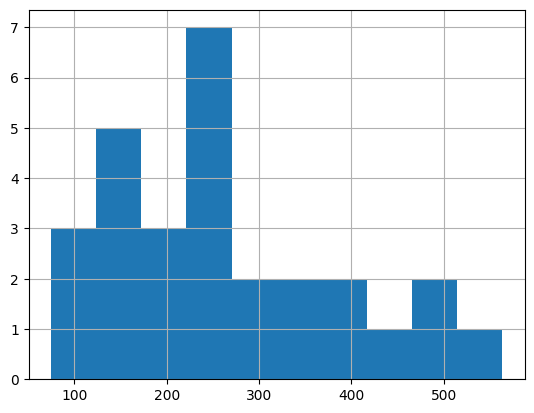

In [136]:
new_df['words_count'].hist(bins=10)

In [137]:
new_df.to_csv('radik_data.csv', index=False)